In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.read_csv('./X_Features_concat_final.csv')
y = pd.read_csv('./y_open_0905~_1000(5min)/y_open_0910.csv')

In [3]:
# 시간 형태로 변경
X['date'] = pd.to_datetime(X['date'] ,format="%Y-%m-%d")
y['date'] = pd.to_datetime(y['date'],format= "%Y%m%d")

df = pd.merge(X,y, on='date',how='inner')
df.set_index('date', inplace=True)
df.dropna(inplace=True)


In [4]:
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df['open']=df['open'].shift(-1)
df['kodex_open']=df['kodex_open'].shift(-1)
df['kosdaq_open'] = df['kosdaq_open'].shift(-1)
df.dropna(inplace=True)

In [6]:
# X, y 정의
y = df[['open']]
X = df.drop(columns='open')

In [7]:
# Check the data types of the features in 'X'
X_dtypes = X.dtypes

# Display the data types that are not numeric
non_numeric_columns = X_dtypes[X_dtypes != 'float64'][X_dtypes != 'int64']
non_numeric_columns

# Function to convert percentage strings to float values
def convert_percentage(val):
    new_val = val.replace('%', '')
    return float(new_val) / 100

# Remove commas and convert percentage strings to floats
for column in non_numeric_columns.index:
    if 'percentage' in column:
        X[column] = X[column].apply(convert_percentage)
    else:
        X[column] = X[column].str.replace(',', '').astype(float)

# Confirm the conversions by checking datatypes again
X_dtypes_converted = X.dtypes
X_dtypes_converted



ant_vol                    float64
foreigner_vol              float64
sp500_closing              float64
sp500_opening              float64
sp500_high                 float64
sp500_low                  float64
sp500_change_percentage    float64
krx_close                  float64
krx_diff                   float64
krx_return                 float64
PER                        float64
PBR                        float64
Dividend_Yield             float64
GOLD_RETURN                float64
MEAL_RETURN                float64
SP_500_RETURN                int64
USD_KRW_RETURN             float64
VIX_RETURN                 float64
WTI_RETURN                 float64
BTC_RETURN                 float64
KR_3Y                      float64
KR_10Y                     float64
USA_3Y                     float64
USA_10Y                    float64
kodex_open                 float64
kodex_high                   int64
kodex_low                    int64
kodex_close                  int64
kodex_volume        

In [8]:
len(X.columns)

36

In [9]:
X

,ant_vol,foreigner_vol,sp500_closing,sp500_opening,sp500_high,sp500_low,sp500_change_percentage,krx_close,krx_diff,krx_return,...,kodex_low,kodex_close,kodex_volume,kosdaq_open,kosdaq_high,kosdaq_low,kosdaq_close,kosdaq_volume,KODEX_return,Kosdaq150_return
date,,,,,,,,,,,,,,,,,,,,,
2018-10-01,1.242308e+11,-5.412085e+10,2924.59,2926.29,2937.06,2917.91,0.0036,300.17,-0.34,-0.11,...,27000,27099,4925895,13474.0,13608,13383,13498,3030079,-23.0,-24.0
2018-10-02,3.089235e+11,-2.411324e+11,2923.43,2923.80,2931.42,2919.37,-0.0004,296.53,-3.64,-1.21,...,26752,26770,5084354,13063.0,13512,13005,13005,3060141,36.0,58.0
2018-10-04,5.810753e+11,-5.293728e+11,2901.61,2919.35,2919.78,2883.92,-0.0082,291.78,-4.75,-1.60,...,26307,26356,8133088,12881.0,13130,12799,12924,4506692,-40.0,-43.0
2018-10-05,2.024331e+11,-3.306595e+11,2885.57,2902.54,2909.64,2869.29,-0.0055,291.28,-0.50,-0.17,...,26140,26316,8808307,12661.0,13020,12603,12670,4261503,-122.0,-9.0
2018-10-08,1.329574e+11,-1.781613e+11,2884.43,2877.53,2889.45,2862.08,-0.0004,289.91,-1.37,-0.47,...,26176,26185,5286714,12517.0,12895,12508,12508,6036573,45.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-18,-7.433821e+10,2.402610e+11,4314.60,4357.35,4364.20,4303.84,-0.0134,328.82,1.47,0.45,...,32825,33060,5119785,12480.0,12935,12700,12730,7180979,-425.0,-250.0
2023-10-19,5.706886e+11,-2.119285e+11,4278.00,4321.36,4339.54,4269.69,-0.0085,322.76,-6.06,-1.84,...,32410,32430,5179844,12205.0,12525,12345,12385,13563027,-255.0,-180.0
2023-10-20,4.897424e+10,1.560520e+11,4224.16,4273.85,4276.56,4223.03,-0.0126,317.96,-4.80,-1.49,...,31815,31940,5747441,12095.0,12335,12000,12130,22987290,-35.0,-35.0


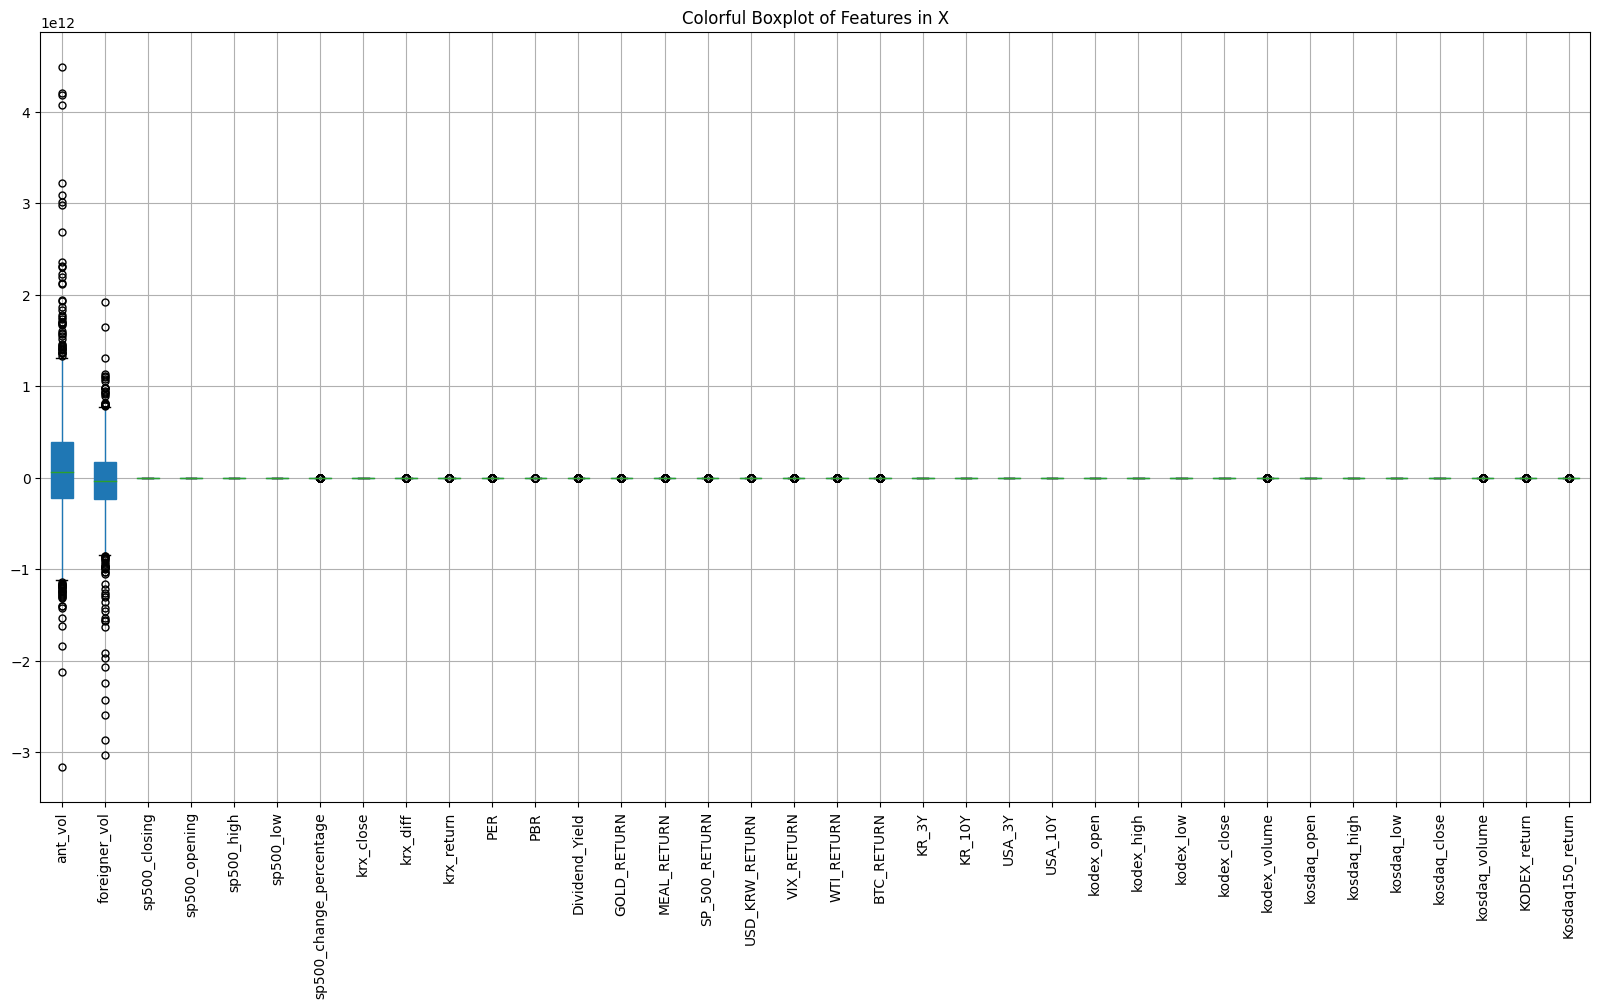

In [10]:
import matplotlib.pyplot as plt

# Plotting the boxplots with a color scheme
plt.figure(figsize=(20, 10))
X.boxplot(rot=90, patch_artist=True, showfliers=True, flierprops=dict(marker='o', color='red', markersize=5))
plt.title('Colorful Boxplot of Features in X')
plt.show()


In [11]:
X['ant_vol'].head()

date
2018-10-01    1.242308e+11
2018-10-02    3.089235e+11
2018-10-04    5.810753e+11
2018-10-05    2.024331e+11
2018-10-08    1.329574e+11
Name: ant_vol, dtype: float64

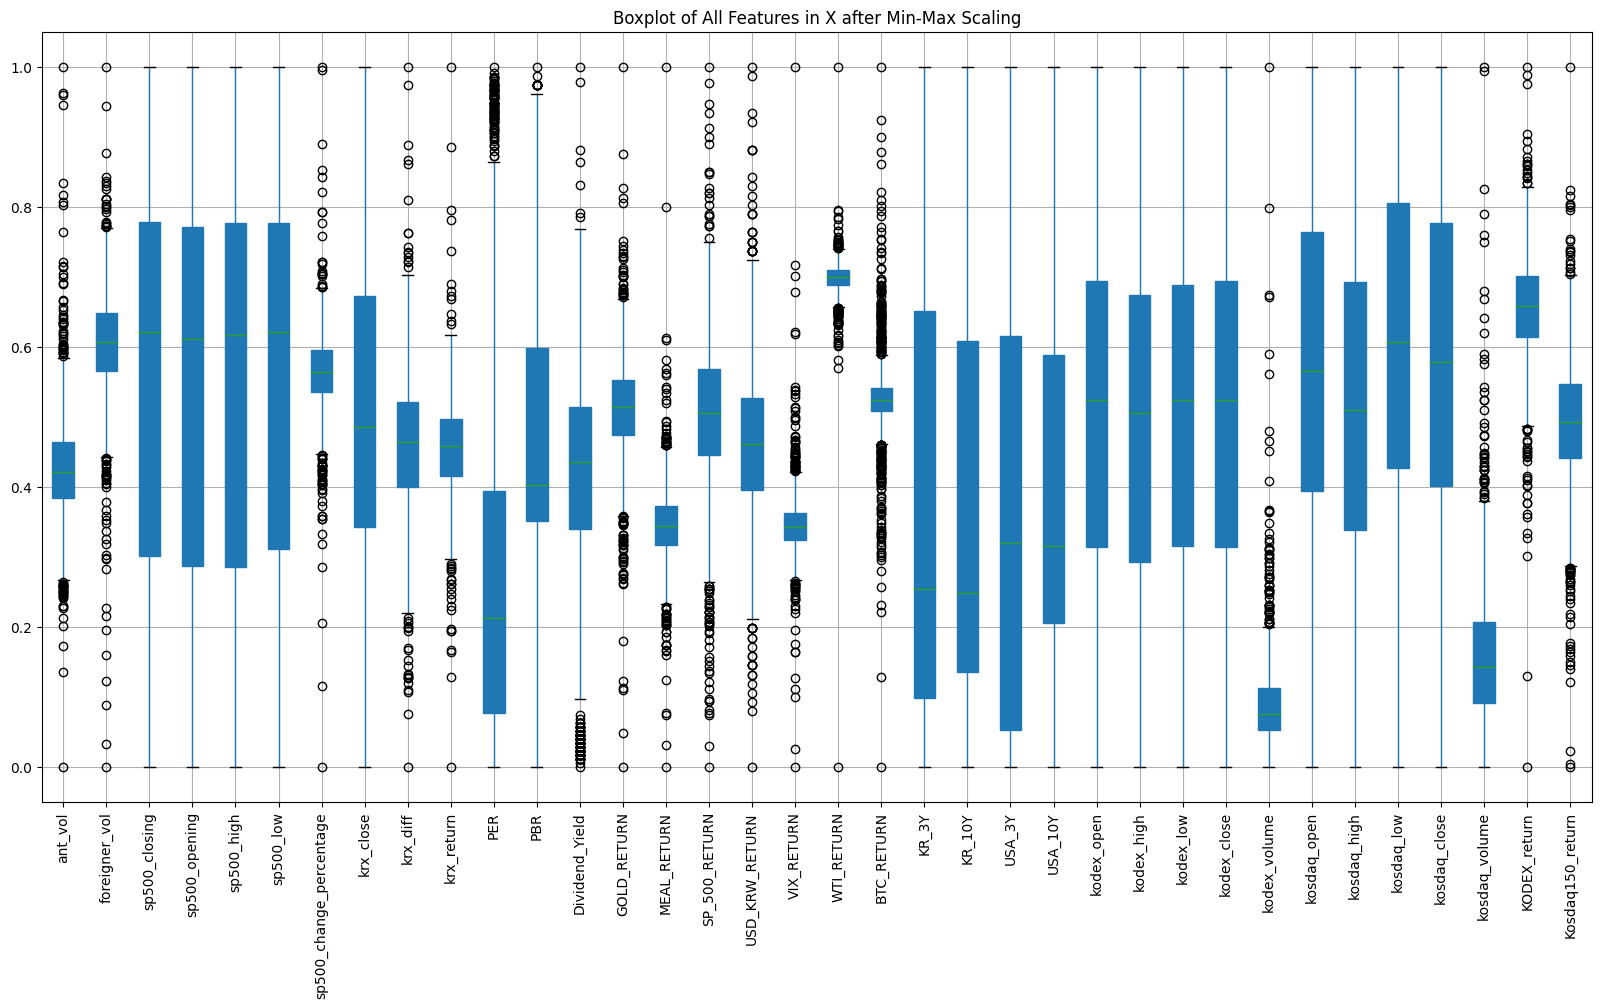

In [12]:
from sklearn.preprocessing import MinMaxScaler
# Apply Min-Max scaling to all features in X
X_scaled_full = MinMaxScaler().fit_transform(X)

# Convert the scaled data back to a DataFrame for plotting
X_scaled = pd.DataFrame(X_scaled_full, columns=X.columns)

# Plotting the boxplots for the scaled features
plt.figure(figsize=(20, 10))
X_scaled.boxplot(rot=90, patch_artist=True)
plt.title('Boxplot of All Features in X after Min-Max Scaling')
plt.show()


In [26]:
import statsmodels.api as sm
X_scaled = X_scaled.drop(['kodex_close','PBR','kodex_high','KODEX_return','kosdaq_open','kosdaq_high','WTI_RETURN','krx_close','Dividend_Yield','kosdaq_volume','VIX_RETURN','kosdaq_close','kosdaq_low','kodex_low','USA_3Y','MEAL_RETURN','USA_10Y','GOLD_RETURN','krx_diff','BTC_RETURN','kodex_open','KR_3Y','KR_10Y','kodex_volume'],axis=1)

# OLS 정보 보기 
feature_add = sm.add_constant(X_scaled, has_constant='add')
# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

ValueError: The indices for endog and exog are not aligned

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_cols = X_scaled.select_dtypes(include='number').columns.tolist()  # Remove the target variable from the list

# Calculate VIF for each feature
VIF_data = pd.DataFrame()
VIF_data['feature'] = numeric_cols
VIF_data['VIF'] = [variance_inflation_factor(df[numeric_cols].values, i) for i in range(len(numeric_cols))]

# Display the VIF values
VIF_data.sort_values(by='VIF', ascending=False)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''